#Sasidurka Venkatesan - 991542294

In [1]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.8 MB/s eta 0:00:00
   ━━━━

In [1]:
import pycaret
pycaret.__version__

'3.3.2'

In [41]:
# Importing required libraries
from pycaret.classification import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# URL of the white wine dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

# Downloading the dataset
response = requests.get(url)
with open("winequality-white.csv", "wb") as f:
    f.write(response.content)

data = pd.read_csv('winequality-white.csv', delimiter=';')

#Displaying info
data.info()
data.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


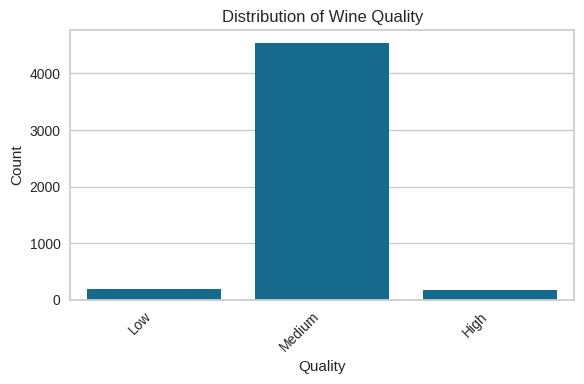

In [59]:
# Defining conditions and choices for quality categories
conditions = [
    data['quality'] <= 4,
    (data['quality'] > 4) & (data['quality'] <= 7),
    data['quality'] > 7
]
choices = ['Low', 'Medium', 'High']

data['quality_category'] = np.select(conditions, choices, default='Not Rated')

# Keep 'quality' as categorical but with string values
data['quality'] = data['quality'].astype(str)

plt.figure(figsize=(6, 4))
sns.countplot(x='quality_category', data=data, order=['Low', 'Medium', 'High'])
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [8]:
# Setting up PyCaret environment
clf_setup = setup(
    data=data,
    target='quality',
    normalize=True,
    normalize_method='minmax',
    session_id=123,
    html=False
)

# Accessing configuration details
get_config('X_train_transformed')

                    Description                       Value
0                    Session id                         123
1                        Target                     quality
2                   Target type                  Multiclass
3                Target mapping  High: 0, Low: 1, Medium: 2
4           Original data shape                  (6497, 12)
5        Transformed data shape                  (6497, 12)
6   Transformed train set shape                  (4547, 12)
7    Transformed test set shape                  (1950, 12)
8              Numeric features                          11
9                    Preprocess                        True
10              Imputation type                      simple
11           Numeric imputation                        mean
12       Categorical imputation                        mode
13                    Normalize                        True
14             Normalize method                      minmax
15               Fold Generator         

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
6393,0.181818,0.160000,0.243902,0.216129,0.360262,0.156250,0.352535,0.347862,0.346457,0.148571,0.202899
1417,0.289256,0.173333,0.268293,0.061290,0.120087,0.069444,0.071429,0.348293,0.480315,0.308571,0.594203
531,0.669421,0.200000,0.398374,0.067742,0.194323,0.038194,0.082949,0.572720,0.330709,0.217143,0.333333
989,0.487603,0.143333,0.325203,0.029032,0.139738,0.045139,0.034562,0.363831,0.314960,0.160000,0.420290
5412,0.264463,0.146667,0.227642,0.051613,0.072052,0.069444,0.394009,0.195511,0.362205,0.194286,0.492754
...,...,...,...,...,...,...,...,...,...,...,...
3967,0.297521,0.173333,0.243902,0.461290,0.061135,0.239583,0.375576,0.425117,0.401575,0.080000,0.347826
3740,0.322314,0.133333,0.284553,0.474194,0.102620,0.104167,0.255760,0.546829,0.417323,0.154286,0.231884
254,0.272727,0.346667,0.000000,0.038710,0.141921,0.052083,0.064516,0.434612,0.574803,0.268571,0.275362
2078,0.206612,0.093333,0.268293,0.035484,0.069869,0.229167,0.364055,0.244713,0.456693,0.188571,0.347826


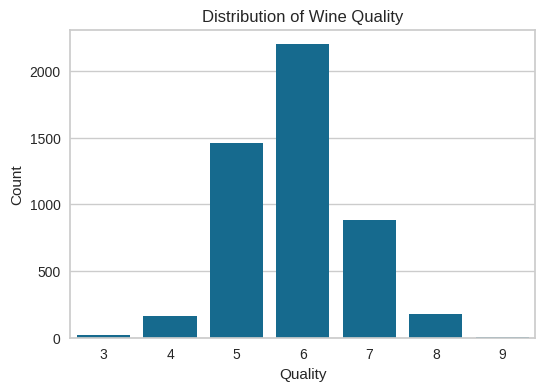

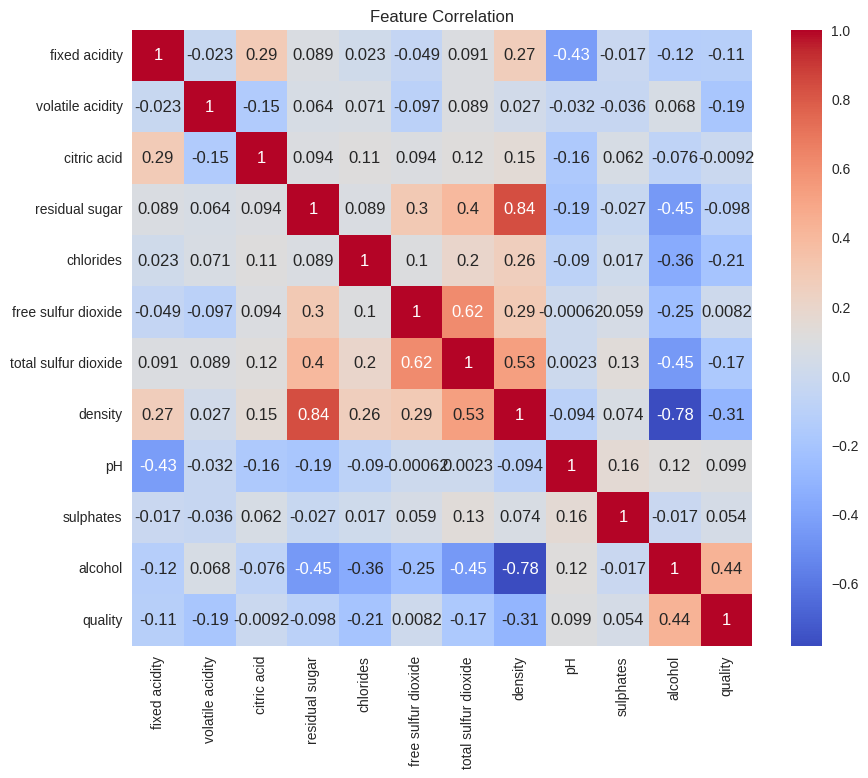

In [42]:
# Distributing of Target Classes
plt.figure(figsize=(6, 4))
sns.countplot(x='quality', data=data)
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 8))

numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title('Feature Correlation')
plt.show()


In [12]:
# Comparing all models to select the best one
best_model = compare_models()

# Displaying the best model
print("Best Model Selected:")
print(best_model)



Processing: 100%|██████████| 65/65 [01:21<00:00,  1.06it/s]
                                                           

                                    Model  Accuracy     AUC  Recall   Prec.  \
rf               Random Forest Classifier    0.8062  0.8784  0.8062  0.8083   
et                 Extra Trees Classifier    0.8043  0.8851  0.8043  0.8058   
xgboost         Extreme Gradient Boosting    0.7999  0.8580  0.7999  0.7997   
lightgbm  Light Gradient Boosting Machine    0.7816  0.8494  0.7816  0.7809   
gbc          Gradient Boosting Classifier    0.7495  0.0000  0.7495  0.7451   
knn                K Neighbors Classifier    0.7189  0.7759  0.7189  0.7069   
dt               Decision Tree Classifier    0.7174  0.7196  0.7174  0.7205   
ridge                    Ridge Classifier    0.7145  0.0000  0.7145  0.6896   
lr                    Logistic Regression    0.7134  0.0000  0.7134  0.6884   
lda          Linear Discriminant Analysis    0.7099  0.0000  0.7099  0.6853   
svm                   SVM - Linear Kernel    0.7086  0.0000  0.7086  0.6885   
ada                  Ada Boost Classifier    0.6906 


Processing: 100%|██████████| 4/4 [00:12<00:00,  2.90s/it]
                                                         

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8264  0.8963  0.8264  0.8259  0.8223  0.6427  0.6449
1       0.8132  0.8778  0.8132  0.8175  0.8045  0.6124  0.6151
2       0.7956  0.8600  0.7956  0.7991  0.7908  0.5799  0.5812
3       0.8462  0.9037  0.8462  0.8457  0.8422  0.6838  0.6858
4       0.7956  0.8665  0.7956  0.7997  0.7894  0.5793  0.5807
5       0.7824  0.8715  0.7824  0.7815  0.7736  0.5426  0.5496
6       0.8154  0.8831  0.8154  0.8149  0.8118  0.6221  0.6233
7       0.8018  0.8758  0.8018  0.8046  0.7972  0.5900  0.5919
8       0.8018  0.8751  0.8018  0.8056  0.7952  0.5901  0.5920
9       0.7841  0.8741  0.7841  0.7883  0.7779  0.5546  0.5561
Mean    0.8062  0.8784  0.8062  0.8083  0.8005  0.5997  0.6020
Std     0.0186  0.0124  0.0186  0.0177  0.0196  0.0398  0.0393



Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits



Processing: 100%|██████████| 7/7 [02:14<00:00, 15.70s/it]
                                                         

Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7121  0.7740  0.7121  0.7245  0.7052  0.4186  0.4198
1       0.7231  0.7728  0.7231  0.7023  0.7124  0.4346  0.4355
2       0.7121  0.7491  0.7121  0.7048  0.7045  0.4045  0.4062
3       0.7385  0.7727  0.7385  0.7135  0.7242  0.4510  0.4547
4       0.6857  0.7462  0.6857  0.6704  0.6773  0.3653  0.3664
5       0.6879  0.7445  0.6879  0.6646  0.6619  0.3144  0.3326
6       0.7187  0.7585  0.7187  0.7091  0.7111  0.4252  0.4258
7       0.7181  0.7825  0.7181  0.7178  0.7172  0.4376  0.4382
8       0.6696  0.7246  0.6696  0.6554  0.6589  0.3088  0.3115
9       0.6872  0.7279  0.6872  0.6816  0.6793  0.3578  0.3584
Mean    0.7053  0.7553  0.7053  0.6944  0.6952  0.3918  0.3949
Std     0.0203  0.0191  0.0203  

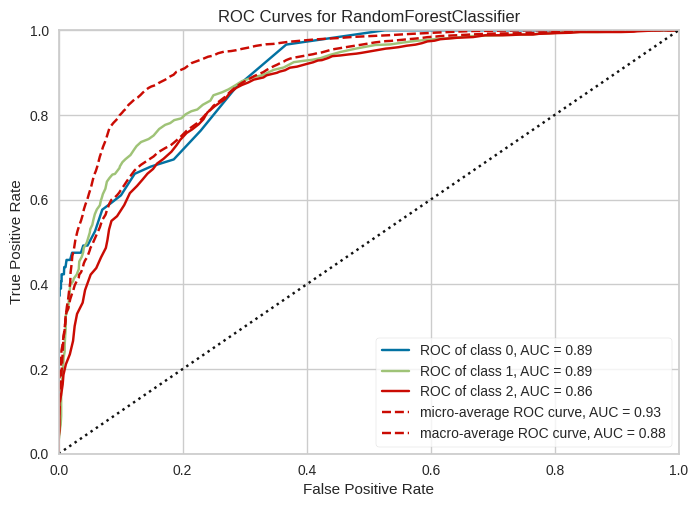

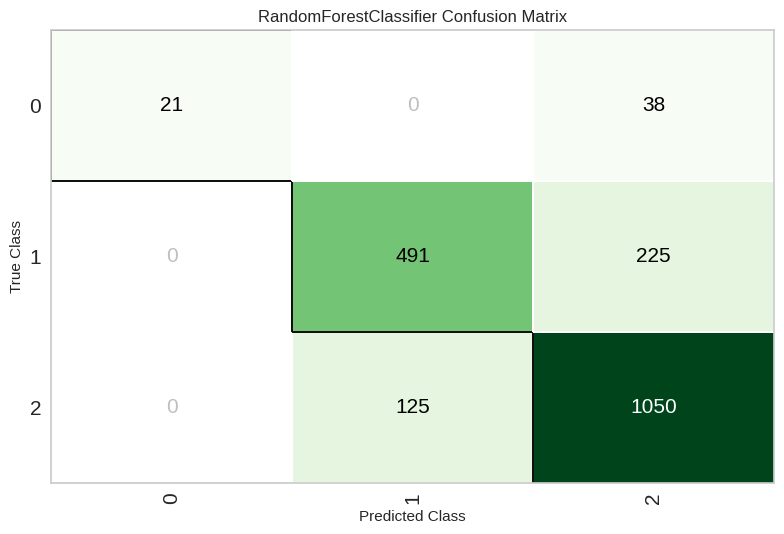

In [13]:
# Creating the selected model
created_model = create_model(best_model)

# Tuning the model
tuned_model = tune_model(created_model)
print("Tuned Model:")
print(tuned_model)

# Plotting AUC and Confusion Matrix for the tuned model
plot_model(tuned_model, plot='auc')
plot_model(tuned_model, plot='confusion_matrix')


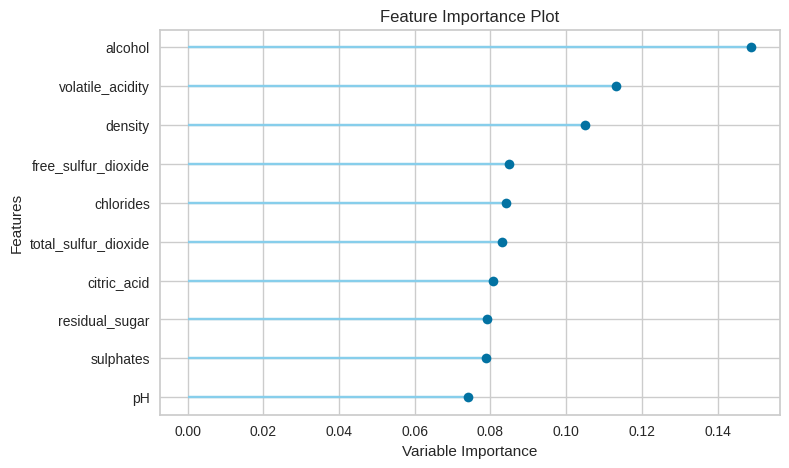

In [61]:
# ploting feature importance
plot_model(tuned_model, plot='feature')

In [62]:
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

In [66]:
best_model = compare_models()
print("Best Model Selected:")
print(best_model)

                                    Model  Accuracy     AUC  Recall   Prec.  \
rf               Random Forest Classifier    0.8062  0.8784  0.8062  0.8083   
et                 Extra Trees Classifier    0.8043  0.8851  0.8043  0.8058   
xgboost         Extreme Gradient Boosting    0.7999  0.8580  0.7999  0.7997   
lightgbm  Light Gradient Boosting Machine    0.7816  0.8494  0.7816  0.7809   
gbc          Gradient Boosting Classifier    0.7495  0.0000  0.7495  0.7451   
knn                K Neighbors Classifier    0.7189  0.7759  0.7189  0.7069   
dt               Decision Tree Classifier    0.7174  0.7196  0.7174  0.7205   
ridge                    Ridge Classifier    0.7145  0.0000  0.7145  0.6896   
lr                    Logistic Regression    0.7134  0.0000  0.7134  0.6884   
lda          Linear Discriminant Analysis    0.7099  0.0000  0.7099  0.6853   
svm                   SVM - Linear Kernel    0.7086  0.0000  0.7086  0.6885   
ada                  Ada Boost Classifier    0.6906 

In [67]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [68]:
predictions = predict_model(best_model)
print("Predictions on Test Set:")
print(predictions.head())

                      Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  Random Forest Classifier     0.801  0.8729   0.801  0.8048  0.7952  0.5837   

      MCC  
0  0.5896  
Predictions on Test Set:
      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
2356            6.8              0.22         0.37            15.2      0.051   
3444            7.4              0.44         0.20            11.5      0.049   
5705            5.3              0.23         0.56             0.9      0.041   
4693            9.7              0.24         0.49             4.9      0.032   
401             7.7              0.26         0.30             1.7      0.059   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
2356                 68.0                 178.0  0.99935  3.40       0.85   
3444                 44.0                 157.0  0.99800  3.27       0.44   
5705                 46.0                 141.0  0.99119  3.16       0

In [77]:
new_data = data.copy()
new_data.drop('quality', axis=1, inplace=True)
new_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_category
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Medium


In [70]:
save_model(best_model, 'white_wine_quality_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed_acidity',
                                              'volatile_acidity', 'citric_acid',
                                              'residual_sugar', 'chlorides',
                                              'free_sulfur_dioxide',
                                              'total_sulfur_dioxide', 'density',
                                              'pH', 's...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
                       

In [85]:
loaded_model = load_model('white_wine_quality_model')
loaded_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed_acidity',
                                             'volatile_acidity', 'citric_acid',
                                             'residual_sugar', 'chlorides',
                                             'free_sulfur_dioxide',
                                             'total_sulfur_dioxide', 'densi...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=-1, oob_score=False,
                                        random_state=123, verbose=0,
                                        warm_start=False))],
         verbose=False)

In [84]:
X_train_transformed = get_config('X_train_transformed')

In [86]:
clf_setup = setup(
    data=data,
    target='quality',
    normalize=True,
    normalize_method='minmax',
    session_id=123,
    html=False
)
get_config()

                    Description                                     Value
0                    Session id                                       123
1                        Target                                   quality
2                   Target type                                Multiclass
3                Target mapping  3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6
4           Original data shape                                (4898, 13)
5        Transformed data shape                                (4898, 15)
6   Transformed train set shape                                (3428, 15)
7    Transformed test set shape                                (1470, 15)
8              Numeric features                                        11
9          Categorical features                                         1
10                   Preprocess                                      True
11              Imputation type                                    simple
12           Numeric imputation       

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [87]:
get_config('X_train_transformed')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_category_Medium,quality_category_Low,quality_category_High
2146,0.326923,0.034314,0.180723,0.095092,0.131737,0.083624,0.222738,0.159823,0.660551,0.227848,0.258065,1.0,0.0,0.0
2095,0.442308,0.196078,0.240964,0.127301,0.107784,0.108014,0.317865,0.225370,0.623853,0.303797,0.209677,1.0,0.0,0.0
2671,0.201923,0.215686,0.180723,0.021472,0.053892,0.125436,0.308585,0.034894,0.633028,0.240506,0.790323,1.0,0.0,0.0
875,0.317308,0.127451,0.192771,0.024540,0.074850,0.090592,0.306265,0.113552,0.440367,0.443038,0.322581,1.0,0.0,0.0
3973,0.240385,0.186275,0.307229,0.107362,0.110778,0.114983,0.443155,0.161365,0.403670,0.405063,0.225806,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4393,0.250000,0.098039,0.168675,0.252301,0.104790,0.177700,0.301624,0.195296,0.486239,0.164557,0.403226,1.0,0.0,0.0
2151,0.375000,0.196078,0.210843,0.225460,0.131737,0.101045,0.250580,0.244650,0.504587,0.354430,0.258065,1.0,0.0,0.0
1257,0.250000,0.088235,0.162651,0.093558,0.071856,0.299652,0.496520,0.148254,0.513761,0.164557,0.354839,1.0,0.0,0.0
619,0.346154,0.107843,0.180723,0.012270,0.134731,0.108014,0.292343,0.113552,0.366972,0.354430,0.258065,1.0,0.0,0.0


,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6"
4,Original data shape,"(4898, 13)"
5,Transformed data shape,"(4898, 15)"
6,Transformed train set shape,"(3428, 15)"
7,Transformed test set shape,"(1470, 15)"
8,Numeric features,11
9,Categorical features,1


<Axes: >

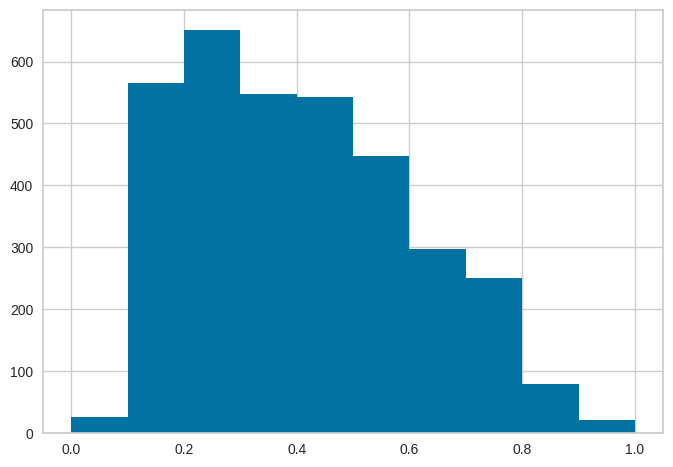

In [92]:
s = setup(data, target = 'quality', session_id = 123,
          normalize = True, normalize_method = 'minmax')
get_config('X_train_transformed')['alcohol'].hist()

In [93]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7176,0.3513,0.7176,0.7214,0.7117,0.5693,0.5753,1.3130
et,Extra Trees Classifier,0.7150,0.3534,0.7150,0.7196,0.7086,0.5646,0.5714,1.0100
lightgbm,Light Gradient Boosting Machine,0.6966,0.3428,0.6966,0.6944,0.6924,0.5429,0.5454,4.2850
xgboost,Extreme Gradient Boosting,0.6946,0.3422,0.6946,0.6923,0.6908,0.5400,0.5421,0.5760
gbc,Gradient Boosting Classifier,0.6342,0.0000,0.6342,0.6370,0.6247,0.4379,0.4452,4.6180
dt,Decision Tree Classifier,0.6196,0.2863,0.6196,0.6232,0.6204,0.4394,0.4398,0.1180
knn,K Neighbors Classifier,0.6158,0.3099,0.6158,0.6101,0.6101,0.4230,0.4244,0.2370
lr,Logistic Regression,0.5977,0.0000,0.5977,0.6061,0.5663,0.3625,0.3828,1.0370
ridge,Ridge Classifier,0.5916,0.0000,0.5916,0.5928,0.5319,0.3402,0.3732,0.1730
svm,SVM - Linear Kernel,0.5563,0.0000,0.5563,0.5443,0.5088,0.3239,0.3568,0.1970


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [94]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [95]:
dt = create_model('dt')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5948,0.0000,0.5948,0.6000,0.5964,0.4060,0.4065
1,0.5860,0.0000,0.5860,0.5896,0.5861,0.3928,0.3933
2,0.6122,0.0000,0.6122,0.6132,0.6110,0.4212,0.4221
3,0.6618,0.0000,0.6618,0.6571,0.6590,0.5005,0.5006
4,0.6356,0.7235,0.6356,0.6399,0.6372,0.4651,0.4655
5,0.6531,0.7336,0.6531,0.6487,0.6502,0.4900,0.4903
6,0.5831,0.6776,0.5831,0.5830,0.5831,0.3828,0.3828
7,0.6472,0.7281,0.6472,0.6504,0.6482,0.4776,0.4778
8,0.6433,0.0000,0.6433,0.6498,0.6453,0.4760,0.4766


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [96]:
tuned_model = tune_model(best_model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5685,0.0000,0.5685,0.5629,0.5545,0.3324,0.3406
1,0.5452,0.0000,0.5452,0.5728,0.4932,0.2664,0.2905
2,0.5743,0.0000,0.5743,0.5600,0.5612,0.3499,0.3533
3,0.5656,0.0000,0.5656,0.5600,0.5551,0.3330,0.3376
4,0.5977,0.7578,0.5977,0.5862,0.5821,0.3798,0.3866
5,0.5860,0.7460,0.5860,0.5760,0.5768,0.3711,0.3737
6,0.5685,0.7313,0.5685,0.5749,0.5590,0.3326,0.3416
7,0.5831,0.7317,0.5831,0.5812,0.5706,0.3560,0.3633
8,0.5848,0.0000,0.5848,0.5831,0.5822,0.3765,0.3774


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [97]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

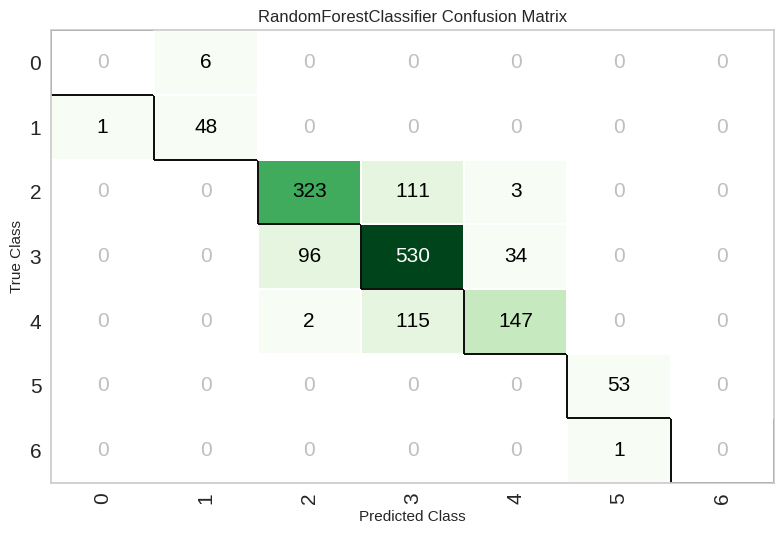

In [98]:
plot_model(tuned_model, plot='confusion_matrix')

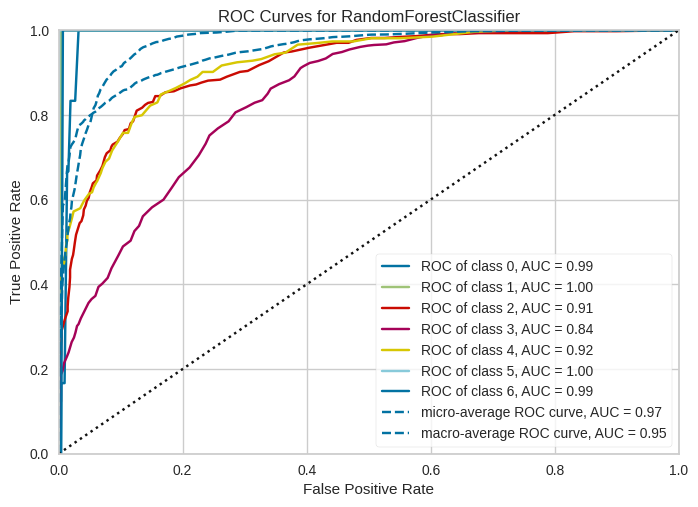

In [99]:
plot_model(tuned_model, plot='auc')

In [100]:
final_model = finalize_model(tuned_model)

In [101]:
save_model(final_model, 'white_wine_modelFinal')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
               